# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).   

## Основные теоретические положения

Дискретный сигнал: $ x_0, x_1, x_2, \ldots, x_{N-1} $ как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $ S(t) $.

Будем считать, что отсчеты $ x_k, \, k = 0, 1, \ldots, N-1 $ дискретного сигнала получены в результате равномерной дискретизации сигнала $ S(t) $ с шагом дискретизации, равным единице: $ x_k = s(t_k), \, k = 0, 1, \ldots, N-1; \, t_k - t_{k-1} = T, \, k = 1, 2, \ldots, N-1; \, T = 1 $

Дискретный сигнал в виде функции от времени: $ s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t-k). \quad $

Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $ 2\pi $: $ S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}, \quad $

Дискретный сигнал можно представить в виде: $ s_d(t) = \sum_{k=-\infty}^{\infty} s(t) \delta(t-kT) \quad $

Дискретный сигнал может быть записан в виде: $ s_d(t) = \frac{1}{T} \sum_{k=-\infty}^{\infty} s(t) e^{i\omega_k t}, \quad $

а спектр: $ S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S\left(\omega - \frac{2\pi k}{T}\right) \quad $

* Формула прямоугольников

$y_{n+1} = y_{n} + s_{n+0.5}$,  $y_{0}=0$

* Формула трапеций
   
$y_{n+1} = y_{n} + \frac{1}{2}(s_{n} + s_{n+1})$,  $y_{0}=0$

* Формула Симпсона

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_{n} + s_{n+1})$,  $y_{0}=0$
  
* Формула численного дифференцирования 1-го порядка

$y_{n+1} = s_{n-1} + \frac{1}{2}(s_{n+1} - s_{n-1})$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

### Задание 1.

Сформировать дискретный сигнал посредством дискретизации с шагом $ T = 1 $ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $ A_k\cos{(\omega_kt+φ_k)} $. Частота каждой из гармоник не должна превышать $ \pi $. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $ \triangle \omega = 0.1\pi $. Амплитуды гармоник $ A_k $ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $ φ_k $ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($ N = 31 $).

In [2]:
# Параметры
T = 1  # шаг дискретизации
num_harmonics = 11
N = 32

# Генерация частот: от 0 до π с шагом 0.1π
omega_k = np.linspace(0, np.pi, num_harmonics)

# Генерация случайных амплитуд от 1 до 11
A_k = np.random.randint(1, 12, num_harmonics)

# Нормализация амплитуд
A_k = A_k / np.sum(A_k)

# Генерация случайных начальных фаз от 0 до 0.5
phi_k = np.random.uniform(0, 0.5, num_harmonics)

# Формирование дискретного сигнала
discrete_time = np.arange(N)
discrete_signal = np.zeros(N)

for k in range(num_harmonics):
    discrete_signal += A_k[k] * np.cos(omega_k[k] * discrete_time + phi_k[k])

# Вывод сигнала
print("Дискретный сигнал:")
print(discrete_signal)

Дискретный сигнал:
[ 0.94284465 -0.26781579  0.09169474 -0.15371386  0.19656711 -0.03051983
  0.03214281  0.01106895  0.04458043  0.07772542  0.23848367  0.01196226
  0.1081306   0.05639326 -0.06198775  0.0521105   0.09047584  0.01491659
 -0.06875531  0.00997387  0.94284465 -0.26781579  0.09169474 -0.15371386
  0.19656711 -0.03051983  0.03214281  0.01106895  0.04458043  0.07772542
  0.23848367  0.01196226]


### Задание 2.

Визуализировать исходные аналоговый и дискретизированный сигналы.

In [3]:
fine_time_steps = 1000  # количество точек для аналогового графика

# Формирование аналогового сигнала
t_analog = np.linspace(0, N - 1, fine_time_steps)
signal_analog = np.zeros(fine_time_steps)

for k in range(num_harmonics):
    signal_analog += A_k[k] * np.cos(omega_k[k] * t_analog + phi_k[k])


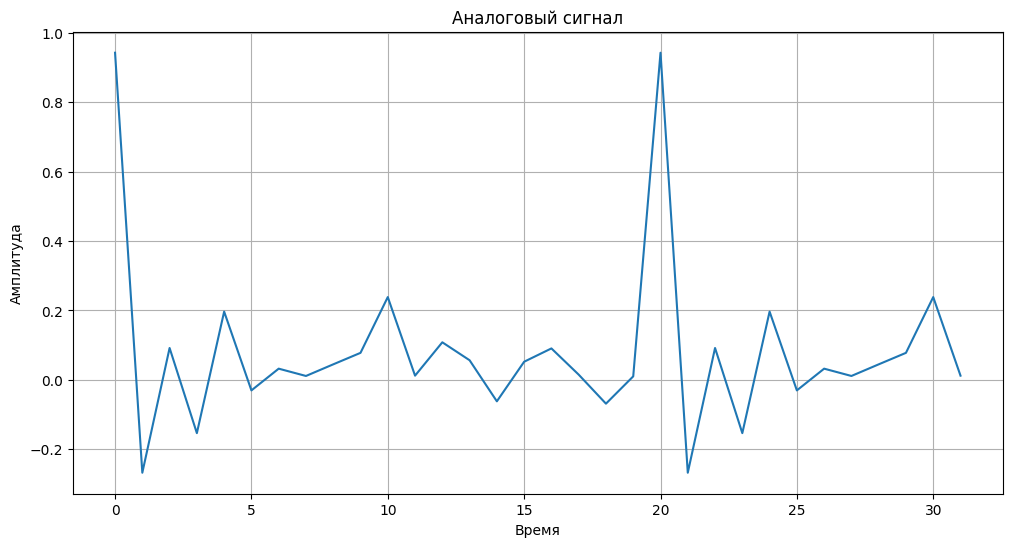

In [4]:
# Визуализация аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(discrete_time, discrete_signal)
plt.title('Аналоговый сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

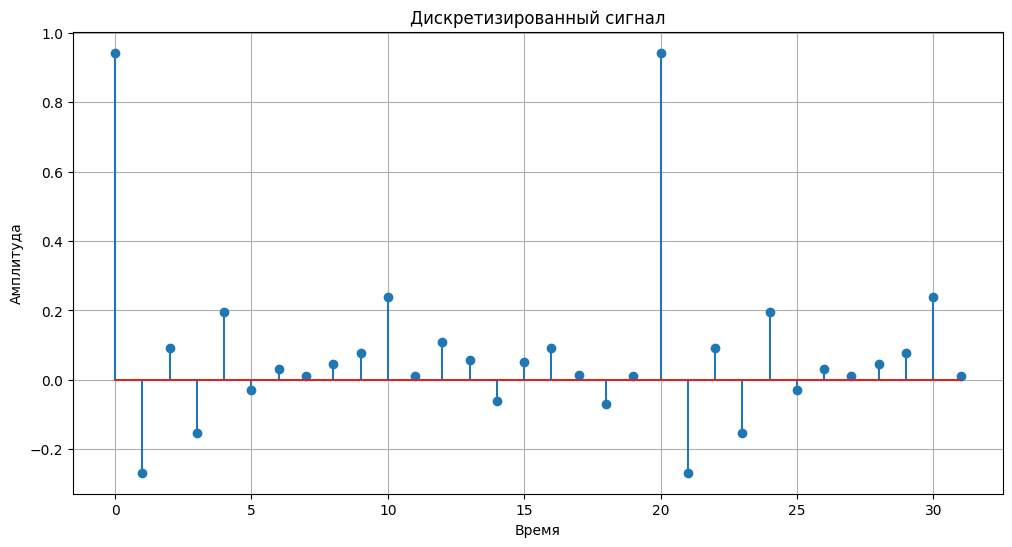

In [5]:
# Визуализация дискретизированного сигнала
plt.figure(figsize=(12, 6))
plt.stem(discrete_time, discrete_signal)
plt.title('Дискретизированный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


### Задание 3.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде:

$
s_d(t) = \sum_{k=-\infty}^{\infty} s(t) \delta(t-kT) \quad
$

Вынесем $ s(t) $ за знак суммы:

$
s_d(t) = s(t) \sum_{k=-\infty}^{\infty} \delta(t-kT) \quad
$

Сумма в может быть представлена комплексным рядом Фурье:

$ 
\sum_{k=-\infty}^{\infty} \delta(t-kT) = \sum_{k=-\infty}^{\infty} c_k e^{i\omega_k t} 
$

где:

$
\omega_k = \frac{2\pi k}{T} \quad ; \quad c_k = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \delta(t) e^{-i\omega_k t} \, dt = \frac{1}{T} 
$

Таким образом дискретный сигнал может быть записан в виде:

$
s_d(t) = \frac{1}{T} \sum_{k=-\infty}^{\infty} s(t) e^{i\omega_k t}, \quad 
$

а его спектр:

$
S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S\left(\omega - \frac{2\pi k}{T}\right) \quad 
$


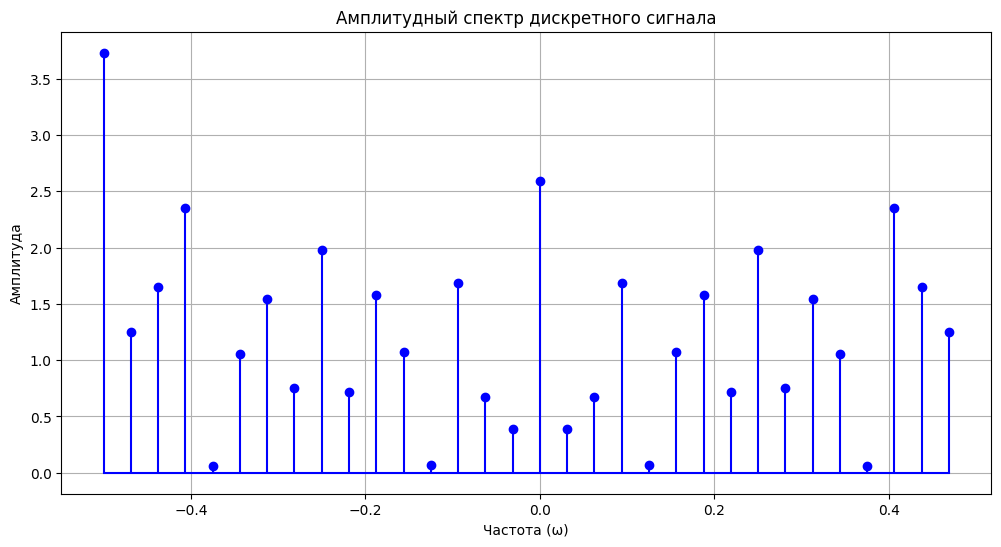

In [6]:
# Вычисление ДПФ дискретного сигнала
spectrum = np.fft.fft(discrete_signal)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация амплитудного спектра
plt.figure(figsize=(12, 6))
plt.stem(freqs, np.abs(spectrum), 'b', basefmt="-b")
plt.title('Амплитудный спектр дискретного сигнала')
plt.xlabel('Частота (ω)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


### Задание 4.

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $ H(\omega) $ – передаточной функции (частотной характеристики) фильтра.

1. Фильтр на 5 точек:

    $
    H_5(\omega) = \frac{1}{5} \sum_{m=0}^{4} e^{-i\omega m} = \frac{1}{5} (1 + e^{-i\omega} + e^{-i2\omega} + e^{-i3\omega} + e^{-i4\omega})
    $

2. Фильтр на 9 точек:

    $
    H_9(\omega) = \frac{1}{9} \sum_{m=0}^{8} e^{-i\omega m} = \frac{1}{9} (1 + e^{-i\omega} + e^{-i2\omega} + \ldots + e^{-i8\omega})
    $

In [7]:
# Фильтры
filter_5 = np.ones(5) / 5
filter_9 = np.ones(9) / 9

# Применение фильтров
smoothed_signal_5 = np.convolve(discrete_signal, filter_5, mode='same')
smoothed_signal_9 = np.convolve(discrete_signal, filter_9, mode='same')


### Задание 5.

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

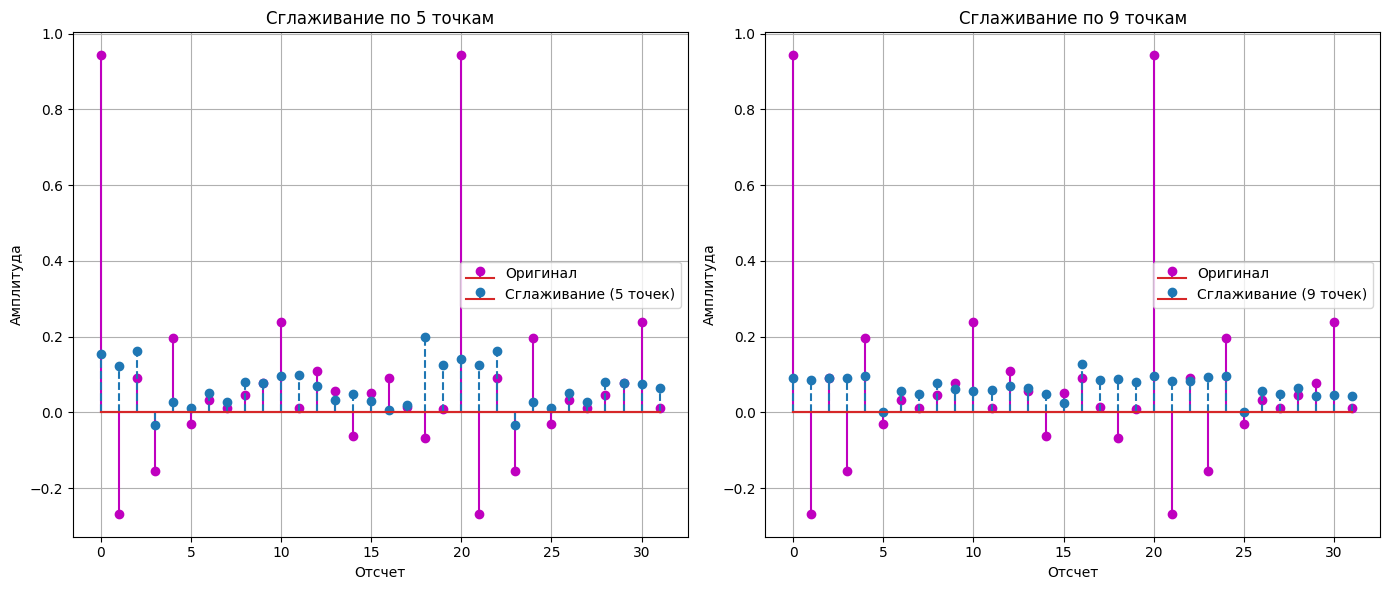

In [8]:
# Визуализация исходного дискретного сигнала и сигнала после сглаживания
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.stem(discrete_time, discrete_signal, linefmt='m', label='Оригинал')
plt.stem(discrete_time, smoothed_signal_5, linefmt='o--', label='Сглаживание (5 точек)')
plt.title('Сглаживание по 5 точкам')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(discrete_time, discrete_signal, linefmt='m', label='Оригинал')
plt.stem(discrete_time, smoothed_signal_9, linefmt='o--', label='Сглаживание (9 точек)')
plt.title('Сглаживание по 9 точкам')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()


### Задание 6.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

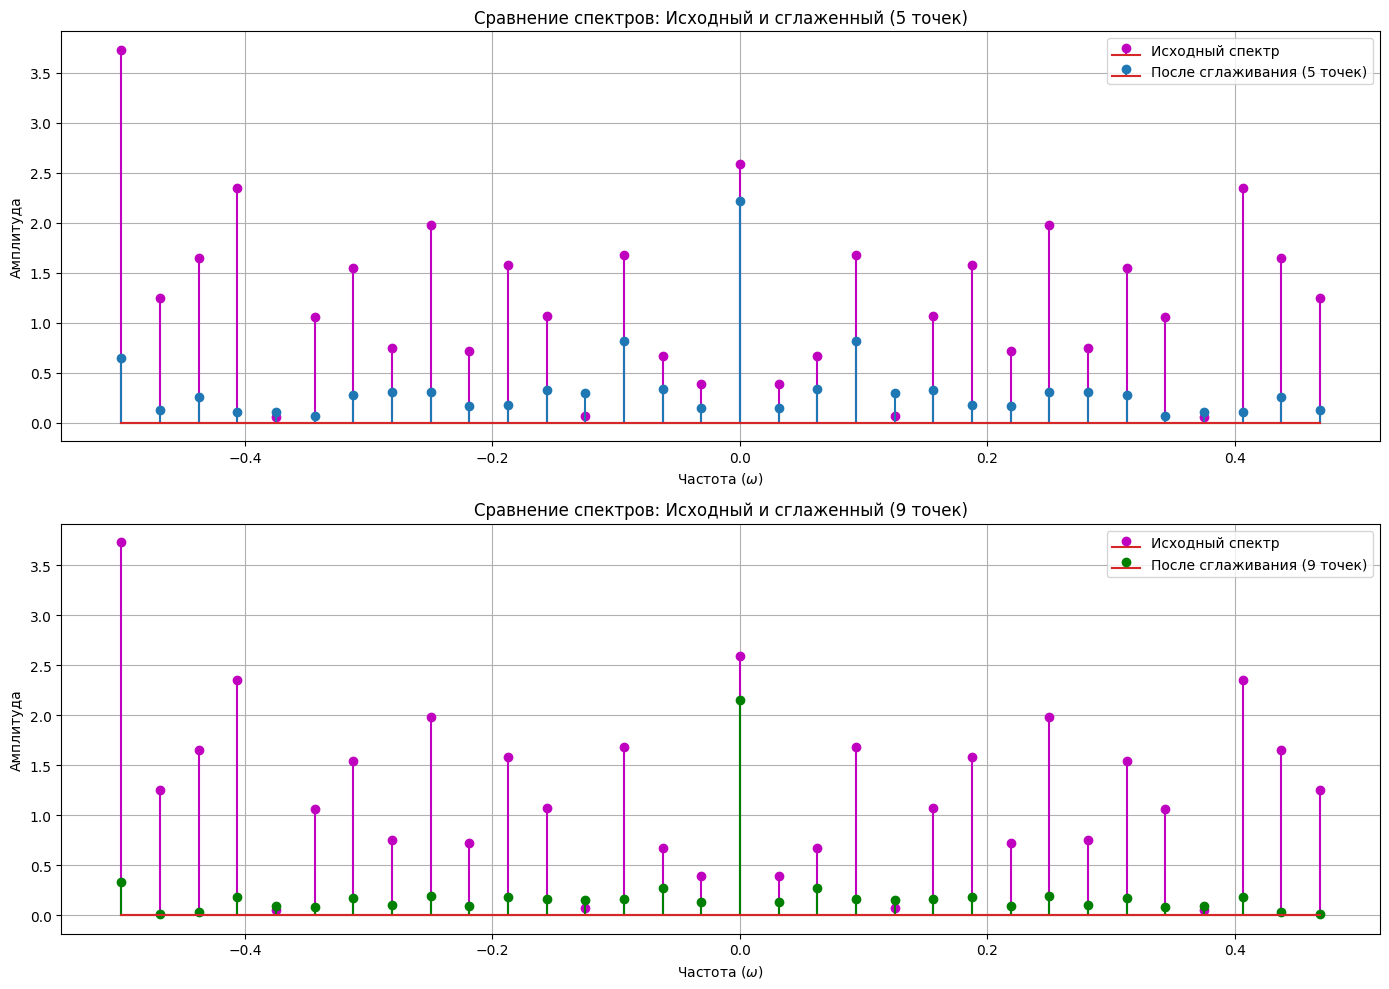

In [9]:
# Вычисление ДПФ для каждого сигнала
spectrum_original = np.fft.fft(discrete_signal, N)
spectrum_smoothed_5 = np.fft.fft(smoothed_signal_5, N)
spectrum_smoothed_9 = np.fft.fft(smoothed_signal_9, N)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация спектров
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.stem(freqs, np.abs(spectrum_original), label='Исходный спектр', linefmt='m')
plt.stem(freqs, np.abs(spectrum_smoothed_5), label='После сглаживания (5 точек)', linefmt='o-')
plt.title('Сравнение спектров: Исходный и сглаженный (5 точек)')
plt.xlabel('Частота $(ω)$')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(freqs, np.abs(spectrum_original), label='Исходный спектр', linefmt='m')
plt.stem(freqs, np.abs(spectrum_smoothed_9), label='После сглаживания (9 точек)', linefmt='g-')
plt.title('Сравнение спектров: Исходный и сглаженный (9 точек)')
plt.xlabel('Частота $(ω)$')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Задание 7.

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

На представленных графиках показаны амплитудные спектры оригинального и сглаженных сигналов. На основе полученных графиков можно сделать следующие выводы:

- Оригинальный сигнал: имеет много частотных компонент, включая и низкочастотные, и высокочастотные составляющие.

- Сглаживание на 5 точек: амплитуды высокочастотных компонент снижаются, но не исчезают полностью. Фильтр сглаживает часть колебаний, сохраняя основные низкочастотные компоненты.

- Сглаживание на 9 точек: более выраженное ослабление высокочастотных компонент. Это связано с тем, что шире окна фильтра позволяют более эффективно усреднять изменения.

**Соответствие $ H(\omega) $**

Низкочастотные компоненты остаются относительно нетронутыми, высокочастотные компоненты заметно ослаблены.

Оба фильтра эффективно снижают амплитуды более высокочастотных компонент, усиливая низкочастотное содержание сигнала.

Фильтр на 9 точек оказывает более сильное влияние на ослабление высокочастотного шума по сравнению с фильтром на 5 точек. Это связано с тем, что большой фильтр усредняет больше значений, тем самым более результативно подавляет высокочастотные компоненты.

### Задание 8.

Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

**Дискретный фильтр, соответсвующий численному дифференцированию 1-го порядка**

- Передаточная функция фильтра формулы прямоугольников:
  
   $ H(\omega) = isinw(\omega)$

**Дискретные фильтры, соответствующие численному интегрированию**

- Передаточная функция фильтра формулы прямоугольников:

  $H(\omega)=  \frac{1}{2isin(\frac{\omega}{2})}$

- Передаточная функция фильтра формулы трапеций:

  $ H(\omega) = \frac{cos(0.5 \omega)}{2i sin(0.5 \omega)}$ 

- Передаточная функция фильтра формулы Симпсона:

  $ H(\omega) = \frac{cos(\omega ) + 2}{3isin\omega} $

Эти выражения описывают, как фильтры воздействуют на различные частоты в сигнале.

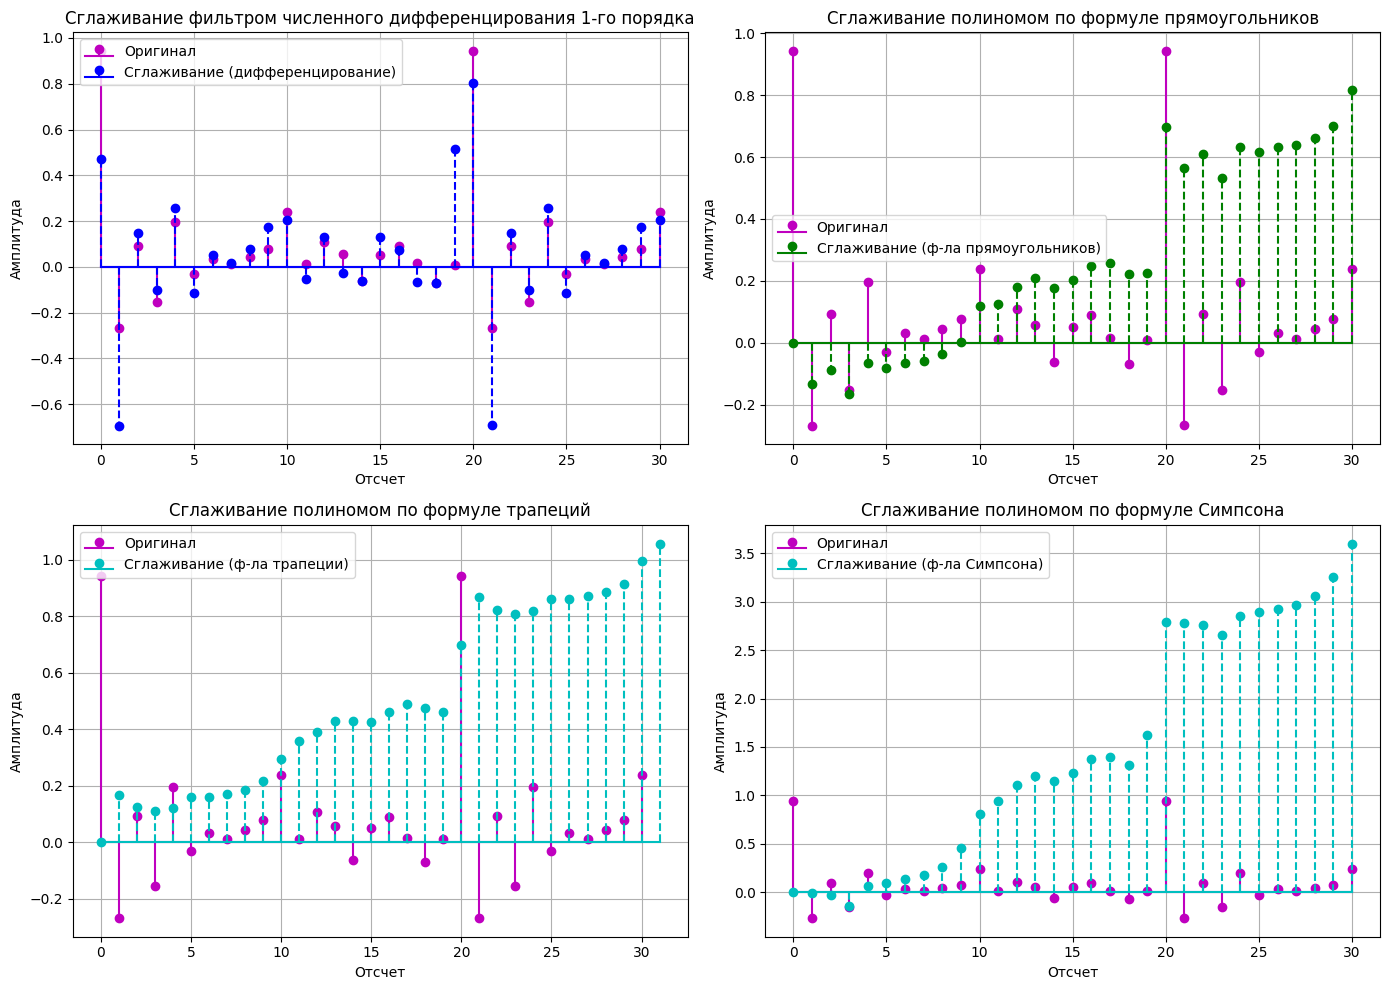

In [10]:
def derivative_filter(inp):
  outp = [inp[0]*0.5]
  for i in range(1, len(inp)-1):
    outp.append(inp[i] + 0.5*(inp[i+1] - inp[i-1]))
  outp.append(inp[-1]*0.5)    
  return outp    

def rectangle_filter(inp):
  outp = [0]
  for i in range(1, len(inp)):
    outp.append(outp[i-1] + 0.5*(inp[int(i+0.5)]))  
  return outp

def trapezoid_filter(inp):
  outp = [0]
  for i in range(0, len(inp)-1):
    outp.append(outp[i] + 0.5*(inp[i+1] + inp[i])/2)  
  return outp

def simpson_filter(inp):
  outp = [0]
  for i in range(1, len(inp)-1):
    outp.append(outp[i-1] + (inp[i+1] + 4*inp[i] + inp[i-1])/3)  
  return outp
  
smoothed_derivative = derivative_filter(discrete_signal)
smoothed_rectangle = rectangle_filter(discrete_signal)
smoothed_trapezoid = trapezoid_filter(discrete_signal)
smoothed_simpson = simpson_filter(discrete_signal)

# Визуализация сглаживания
plt.figure(figsize=(14, 10))

# Чсиленное дифференцирование 1-го порядка
plt.subplot(2, 2, 1)
plt.stem(discrete_time[:-1], discrete_signal[:-1], linefmt='m', markerfmt="mo", basefmt="-m", label='Оригинал')
plt.stem(discrete_time[:-1], smoothed_derivative[:-1], linefmt='b--', markerfmt="bo", basefmt="-b", label='Сглаживание (дифференцирование)')
plt.title('Сглаживание фильтром численного дифференцирования 1-го порядка')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Формула прямоугольников
plt.subplot(2, 2, 2)
plt.stem(discrete_time[:-1], discrete_signal[:-1], linefmt='m', markerfmt="mo", basefmt="-m", label='Оригинал')
plt.stem(discrete_time[:-1], smoothed_rectangle[:-1], linefmt='g--', markerfmt="go", basefmt="-g", label='Сглаживание (ф-ла прямоугольников)')
plt.title('Сглаживание полиномом по формуле прямоугольников')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Формула трапеций
plt.subplot(2, 2, 3)
plt.stem(discrete_time[:-1], discrete_signal[:-1], linefmt='m', markerfmt="mo", basefmt="-m", label='Оригинал')
plt.stem(discrete_time, smoothed_trapezoid, linefmt='c--', markerfmt="co", basefmt="-c", label='Сглаживание (ф-ла трапеции)')
plt.title('Сглаживание полиномом по формуле трапеций')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Формула Симпсона
plt.subplot(2, 2, 4)
plt.stem(discrete_time[:-1], discrete_signal[:-1], linefmt='m', markerfmt="mo", basefmt="-m", label='Оригинал')
plt.stem(discrete_time[:-1], smoothed_simpson, linefmt='c--', markerfmt="co", basefmt="-c", label='Сглаживание (ф-ла Симпсона)')
plt.title('Сглаживание полиномом по формуле Симпсона')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

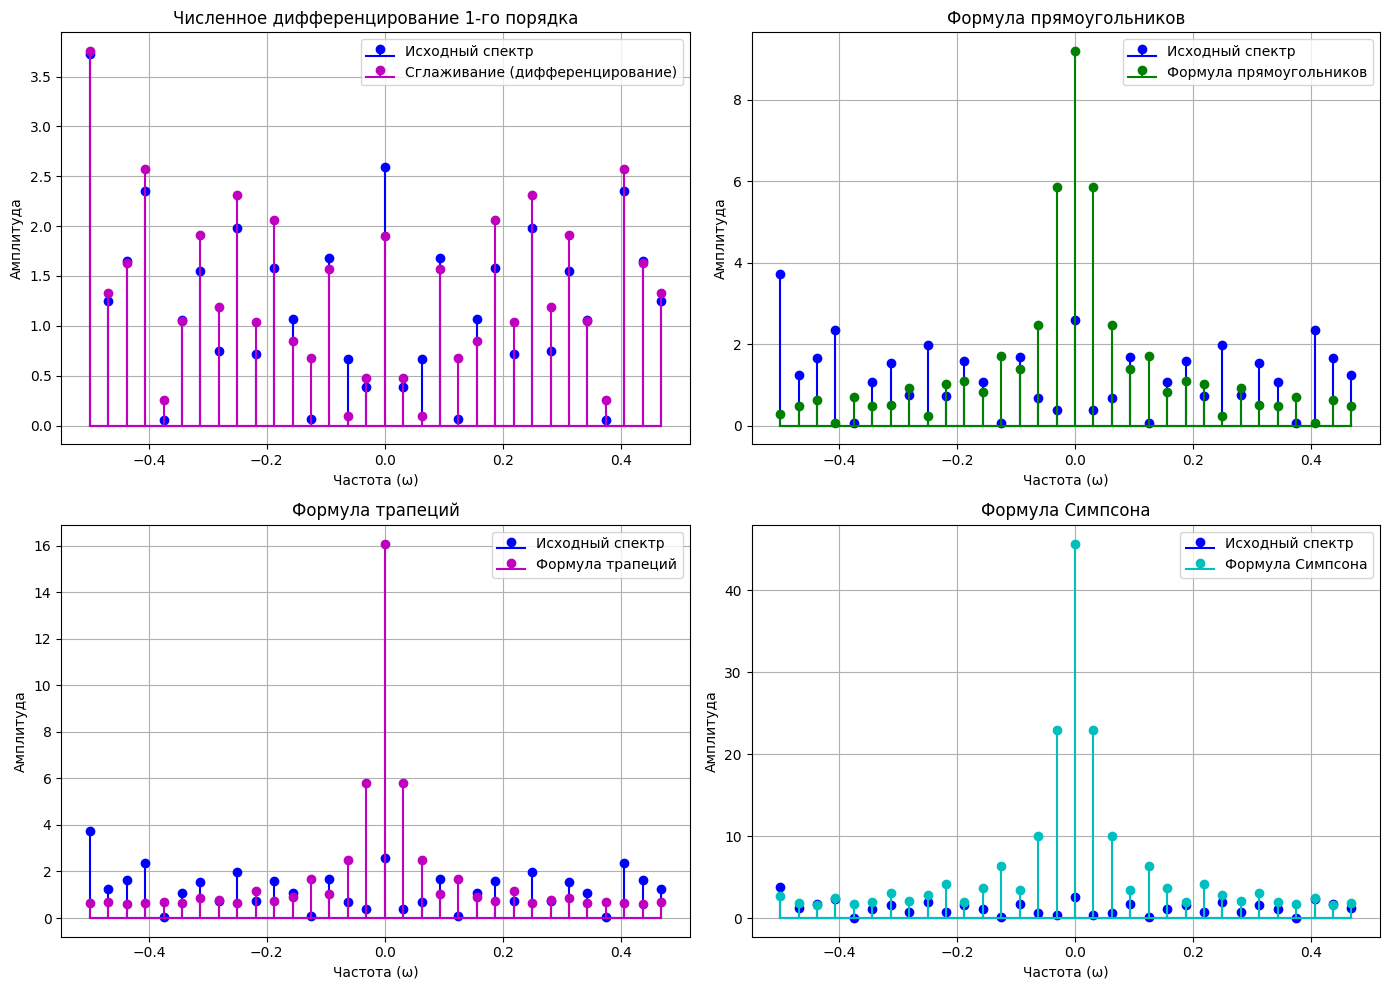

In [11]:
# Вычисление ДПФ
spectrum_original = np.fft.fft(discrete_signal, N)
spectrum_derivative = np.fft.fft(smoothed_derivative, N)
spectrum_rectangle = np.fft.fft(smoothed_rectangle, N)
spectrum_trapezoid = np.fft.fft(smoothed_trapezoid, N)
spectrum_simpson = np.fft.fft(smoothed_simpson, N)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация спектров
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Численное дифференцирование 1-го порядка
axs[0, 0].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[0, 0].stem(freqs, np.abs(spectrum_derivative), 'm', markerfmt="mo", basefmt="-m", label='Сглаживание (дифференцирование)', linefmt='m-')
axs[0, 0].set_title('Численное дифференцирование 1-го порядка')
axs[0, 0].set_xlabel('Частота (ω)')
axs[0, 0].set_ylabel('Амплитуда')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Формула прямоугольников
axs[0, 1].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[0, 1].stem(freqs, np.abs(spectrum_rectangle), 'g', markerfmt="go", basefmt="-g", label='Формула прямоугольников', linefmt='g-')
axs[0, 1].set_title('Формула прямоугольников')
axs[0, 1].set_xlabel('Частота (ω)')
axs[0, 1].set_ylabel('Амплитуда')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Формула трапеций
axs[1, 0].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[1, 0].stem(freqs, np.abs(spectrum_trapezoid), 'm', markerfmt="mo", basefmt="-m", label='Формула трапеций', linefmt='m-')
axs[1, 0].set_title('Формула трапеций')
axs[1, 0].set_xlabel('Частота (ω)')
axs[1, 0].set_ylabel('Амплитуда')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Формула Симпсона
axs[1, 1].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[1, 1].stem(freqs, np.abs(spectrum_simpson), 'c', markerfmt="co", basefmt="-c", label='Формула Симпсона', linefmt='c-')
axs[1, 1].set_title('Формула Симпсона')
axs[1, 1].set_xlabel('Частота (ω)')
axs[1, 1].set_ylabel('Амплитуда')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Проанализируем полученные результаты

1. Фильтр, основанный на численном дифференцировании 1-го порядка немного подавляет низкие и высокие частоты, средние же чуть усиливает.

2. Фильтр, основанный на формуле прямоугольников усиливает низкие частоты, подавляет высокие и средние.
    
3. Фильтр, основанный на формуле трапеций так же подавляет высокие частоты, усиливает низкие, незначительно меняет амплитуду средних.
    
4. Фильтр, основанный на формуле Симпсона заметно усиливает низкие частоты, немного усиливает остальные. 

Полученные результаты соответствуют передаточным функциям.


### Задание 9.

Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

В этой работе была проведена обширная обработка сигнала, начиная с его генерации и заканчивая анализом после применения различных методов сглаживания.

1. Формирование сигнала:
   - Был создан сигнал как линейная комбинация 11 косинусоид, с частотами от 0 до π, шаг которых составлял $ \Delta \omega = 0.1\pi $.
   - Амплитуды $ A_k $ были заданы случайно, нормализованы, чтобы сумма амплитуд была равна 1, что обеспечивает равномерный вклад каждой гармоники в сигнал.
   - Случайные начальные фазы $ \phi_k $ вели к изменению формы сигнала, добавляя ему разнообразия.

2. Дискретизация:
   - Исходный непрерывный сигнал был успешно дискретизирован с шагом $ T = 1 $, что позволило его представить в виде 32 отсчётов.
   - Этот этап был важен для последующей работы, так как дискретный сигнал легче анализировать и обрабатывать.

3. Визуализация:
   - Графики показали согласованность между непрерывным и дискретным сигналами, продемонстрировав, что процесс дискретизации сохранил основные характеристики исходного сигнала.

4. Спектральный анализ:
- Применение дискретного преобразования Фурье (ДПФ) позволило визуализировать спектр сигнала.
- Спектральный анализ продемонстрировал наличие всех частотных компонент, установленных при генерации сигнала.

5. Линейное сглаживание:

    1. Сглаживание на 5 и 9 точек:
       - Показало значительное снижение амплитуд высокочастотных составляющих.
       - Сглаживание на 9 точек было более эффективным в ослаблении высокочастотного шума, что связано с большим числом отсчётов, участвующих в усреднении.
    
    2. Передаточная функция $ H(\omega) $:
       - Соответствовала ожидаемому поведению низкочастотного фильтра, который ослабляет высокие частоты и оставляет низкие практически нетронутыми.

6. Сглаживание фильтром, основанным на формуле численного дифференцирования

  Численное дифференцирование первого порядка отличается от всех фильтров, основанных на численном интегрировании, усиливая средние частоты, ослабляя высокие и низкие.
      

7. Сглаживание фильтрами, основанными на формуле численного интегрирования

   1. Фильтр, соответствующий формуле прямоугольников:
      Данный фильтр усиливает низкие частоты, ослабляет средние и высокие.
    
   2. Фильтр, соответствующий формуле трапеции:
       Так же, как фильтр, соответствующий формуле прямоугольников, ослабляет высокие частоты, не особо изменяет средние и уже более заметно усиливает низкие частоты.
         
   3. Фильтр, соответствующий формуле Симпсона:
       Наблюдается похожий на другие графики спектров фильтров численного интегрирования, но все частоты усиливаются, низкие значительно, средние и высокие - нет.

## Выводы

В ходе выполнения лабораторной работы было изучено формирование дискретного сигнала, а также сделана визуализация сигналов, проанализирован спектр, имело место применение ДПФ для нахождения спектральных компонент дискретного сигнала. Был сделан анализ спектра после сглаживания: повторный анализ спектра показал снижение высокочастотных составляющих - сравнение спектров до и после сглаживания дало представление о влиянии рекурсивных фильтров на частотный состав.